<a href="https://colab.research.google.com/github/abou-zithar/AMIT.Machine.learning/blob/main/amit_project_2_phishing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The phishing problem

In [2]:
# Data Set Information:

# The phishing problem is considered a vital issue in â€œ.COMâ€ industry especially e-banking and e-commerce taking the number of online transactions involving payments.
# We have identified different features related to legitimate and phishy websites and collected 1353 different websites from difference sources.Phishing websites were collected from Phishtank data archive (www.phishtank.com), which is a free community site where users can submit, verify, track and share phishing data. The legitimate websites were collected from Yahoo and starting point directories using a web script developed in PHP. The PHP script was plugged with a browser and we collected 548 legitimate websites out of 1353 websites. There is 702 phishing URLs, and 103 suspicious URLs.

# When a website is considered SUSPICIOUS that means it can be either phishy or legitimate, meaning the website held some legit and phishy features.

# Attribute Information:

# URL Anchor
# Request URL
# SFH
# URL Length
# Having â€™@â€™
# Prefix/Suffix
# IP
# Sub Domain
# Web traffic
# Domain age
# Class

# collected features hold the categorical values , â€œLegitimateâ€, â€Suspiciousâ€ and â€œPhishyâ€, these values have been replaced with numerical values 1,0 and -1 respectively.
# details of each feature are mentioned in the research paper mentioned below

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [5]:
filepath='/content/drive/MyDrive/amit /Website Phishing.csv'
data=pd.read_csv(filepath)

In [6]:
data.head()

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
0,1,-1,1,-1,-1,1,1,1,0,0
1,-1,-1,-1,-1,-1,0,1,1,1,1
2,1,-1,0,0,-1,0,-1,1,0,1
3,1,0,1,-1,-1,0,1,1,0,0
4,-1,-1,1,-1,0,0,-1,1,0,1


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1353 entries, 0 to 1352
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   SFH                1353 non-null   int64
 1   popUpWidnow        1353 non-null   int64
 2   SSLfinal_State     1353 non-null   int64
 3   Request_URL        1353 non-null   int64
 4   URL_of_Anchor      1353 non-null   int64
 5   web_traffic        1353 non-null   int64
 6   URL_Length         1353 non-null   int64
 7   age_of_domain      1353 non-null   int64
 8   having_IP_Address  1353 non-null   int64
 9   Result             1353 non-null   int64
dtypes: int64(10)
memory usage: 105.8 KB


### data has no nulls 

In [8]:
data.shape
# we have 10 features and 1353 data raw so we donot need any feature extrasion or selection

(1353, 10)

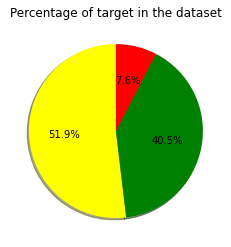

In [9]:
from matplotlib import pyplot as plt
sizes = data['Result'].value_counts(sort = True)
colors = ["yellow","green",'red'] 
plt.pie(sizes, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,)
plt.title('Percentage of target in the dataset')
plt.show()

In [10]:
import plotly.express as px

In [11]:
fig = px.scatter(data)
fig.show()

In [12]:
import seaborn as sns

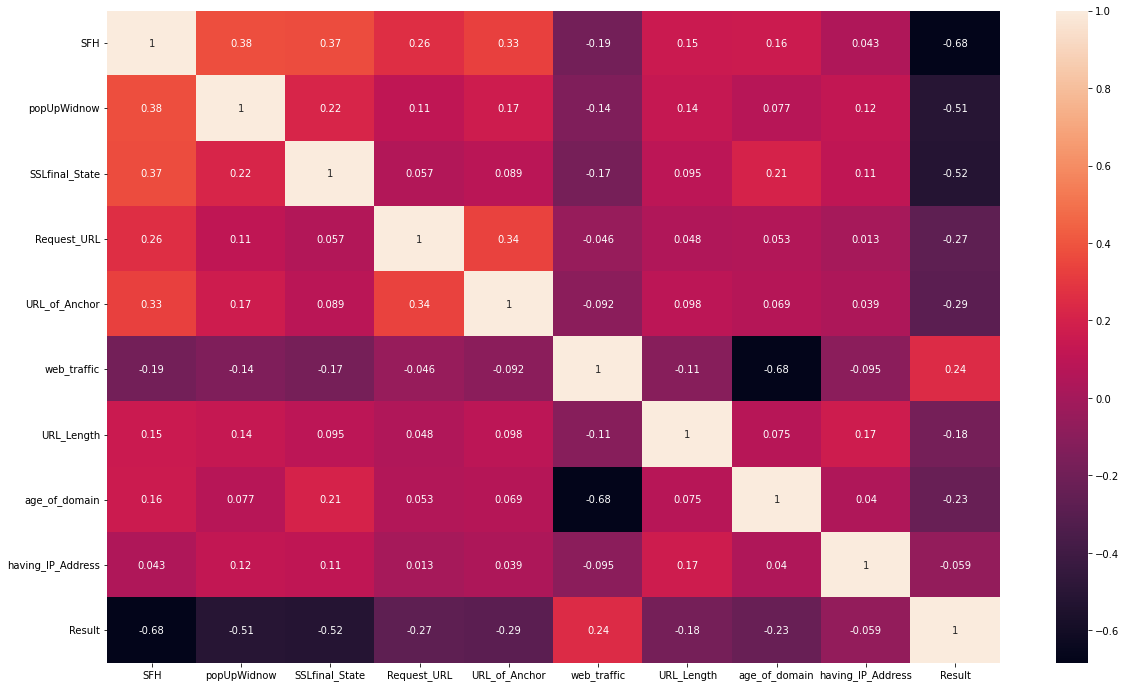

In [13]:
plt.figure(figsize=(20,12))
sns.heatmap(data.corr(),annot=True)

In [14]:
data.describe()

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
count,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000
mean,0.237990,-0.258684,0.327421,-0.223208,-0.025129,0.000000,-0.053215,0.219512,0.114560,-0.113821
std,0.916389,0.679072,0.822193,0.799682,0.936262,0.806776,0.762552,0.975970,0.318608,0.954773
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000
25%,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-1.000000
75%,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## split the data to test and train

In [112]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [113]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)

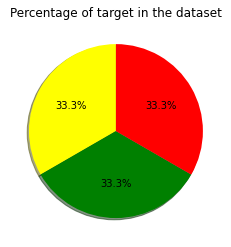

In [114]:
from matplotlib import pyplot as plt
sizes = y_resampled.value_counts(sort = True)
colors = ["yellow","green",'red'] 
plt.pie(sizes, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,)
plt.title('Percentage of target in the dataset')
plt.show()

In [115]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.33, random_state=42)

In [116]:
from sklearn.linear_model import LogisticRegression

In [125]:
model = LogisticRegression()

In [126]:
model.fit(X_train,y_train)

LogisticRegression()

In [127]:
model.score(X_train,y_train)

0.7810063784549964

In [128]:
model.score(X_test,y_test)

0.7496402877697842

In [129]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()

In [130]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [133]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
y_pred=model.predict(X_test)

In [134]:
print("Accuracy :" ,accuracy_score(y_test,y_pred))

Accuracy : 0.9151079136690647
